In [18]:
using Pkg

Pkg.activate("..")

using FoodWebs
using CairoMakie
using StatsBase
using JLD2
using LinearAlgebra

fw = FoodWebs

  Activating project at `~/Projects/Working/HIFMB/TempRanges`


FoodWebs

In [174]:
# stabilityss data
N_vec = [5,10,15,20]
C_vec = [0.1,0.15,0.2,0.25,0.3]

N,C = N_vec[3], C_vec[3]

file_root = join(["../Data/p_sim/",N,"/",C,"/"])
files = readdir(file_root)

#reps, Temp, dispersal, method
λvals = Array{ComplexF64}(undef, 2000, 50, 2, 2)
λvecs = Array{Vector{ComplexF64}}(undef, 2000, 50, 2, 2)
size = Array{Vector{Float64}}(undef, 2000, 50, 2, 2)

for (i,f) = enumerate(files)
    
    fn = join([file_root, f])

    results = load(fn)
    
    for c = 1:50
        for d = 1:2
            J1 = results["jacobians"][c,d]
            J2 = results["jacobians"][c + 50,d]

            λ1 = eigen(J1)
            λ2 = eigen(J2)

            if length(λ1.values) > 0
                λvals[i,c,d,1] = λ1.values[end]
                λvecs[i,c,d,1] = λ1.vectors[end,:]
            else
                λvals[i,c,d,1] = NaN
                λvecs[i,c,d,1] = NaN
            end
            
            if length(λ2.values) > 0
                λvals[i,c,d,2] = λ2.values[end]
                λvecs[i,c,d,2] = λ2.vectors[end,:]
            else
                λvals[i,c,d,2] = NaN
                λvecs[i,c,d,2] = NaN
            end
            
            size[i,c,d,1] = results["params"][c,d].n
            size[i,c,d,2] = results["params"][c + 50,d].n

            
        end
    end
end
    #stability


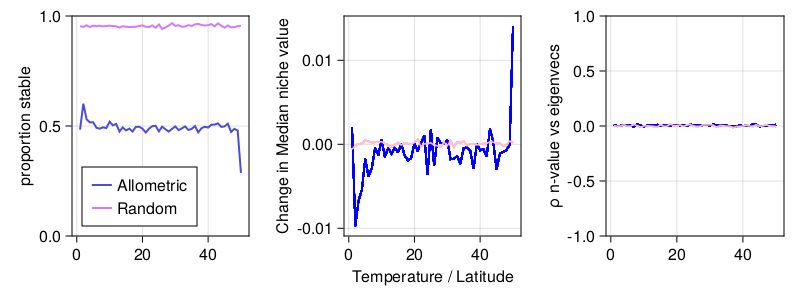

In [296]:
f = Figure(resolution = (800,300))

ax1 = Axis(f[1,1], ylabel = "proportion stable")
ax2 = Axis(f[1,2], ylabel = "Change in Median niche value", xlabel = "Temperature / Latitude")
ax3 = Axis(f[1,3], ylabel = "ρ n-value vs eigenvecs")

getreal(x::Complex) = x.re
getreal(x::Real) = x

psw = mean(getreal.(λvals) .< 0, dims = 1)

series!(ax1, psw[1,:,:,2]',labels = ["Allometric","Random"])
axislegend(ax1, position = :lb)


median_size = median.(size)
Δmedian = median_size[:,:,:,2] .- median_size[:,:,:,1]

real_vecs = map(x -> abs.(x), λvecs)
correlations = cor.(size,real_vecs)[:,:,:,2]

for r = 1:2000
    #plot median size
    # lines!(ax2, Δmedian[r,:,1],color = ("blue", 0.005))
    lines!(ax2, mean(Δmedian[:,:,1], dims = 1)[1,:], color = "blue")

    # lines!(ax2, Δmedian[r,:,2],color = ("pink", 0.005))
    lines!(ax2, mean(Δmedian[:,:,2], dims = 1)[1,:], color = "pink")

    
    #plot correlations
    # lines!(ax3, correlations[r,:,1], color = ("blue", 0.005))
    lines!(ax3, mean(correlations[:,:,1], dims = 1)[1,:], color = "blue")
    
    # lines!(ax3, correlations[r,:,2], color = ("pink", 0.005))
    lines!(ax3, mean(correlations[:,:,2], dims = 1)[1,:], color = "pink")
end

ylims!(ax1,0,1)
ylims!(ax3,-1,1)


f

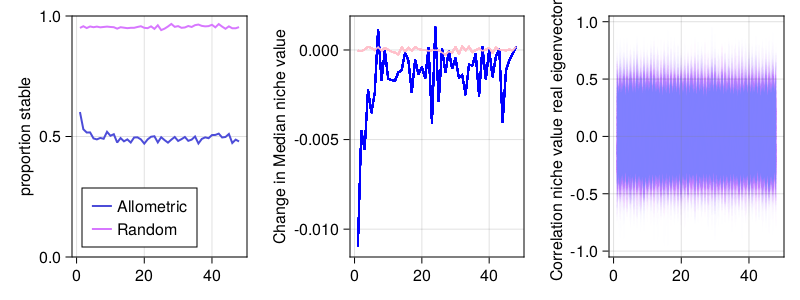

In [297]:
f = Figure(resolution = (800,300))

ax1 = Axis(f[1,1], ylabel = "proportion stable")
ax2 = Axis(f[1,2], ylabel = "Change in Median niche value")
ax3 = Axis(f[1,3], ylabel = "Correlation niche value real eigenvectors")

getreal(x::Complex) = x.re
getreal(x::Real) = x

T_range = 2:49

psw = mean(getreal.(λvals) .< 0, dims = 1)

series!(ax1, psw[1,T_range,:,2]', labels = ["Allometric","Random"])
axislegend(ax1, position = :lb)

median_size = mean.(size)
Δmedian = median_size[:,T_range,:,2] .- median_size[:,T_range,:,1]

real_vecs = map(x -> abs.(x), λvecs)
correlations = cor.(size,real_vecs)[:,T_range,:,2]

for r = 1:2000
    #plot median size
    # lines!(ax2, Δmedian[r,:,1],color = ("blue", 0.005))
    lines!(ax2, mean(Δmedian[:,:,1], dims = 1)[1,:], color = "blue")

    # lines!(ax2, Δmedian[r,:,2],color = ("pink", 0.005))
    lines!(ax2, mean(Δmedian[:,:,2], dims = 1)[1,:], color = "pink")

    
    #plot correlations
    lines!(ax3, correlations[r,:,1], color = ("blue", 0.005))
    # lines!(ax3, mean(correlations[:,:,1], dims = 1)[1,:], color = "blue")
    
    lines!(ax3, correlations[r,:,2], color = ("pink", 0.005))
    # lines!(ax3, mean(correlations[:,:,2], dims = 1)[1,:], color = "pink")
end

ylims!(ax1,0,1)


f

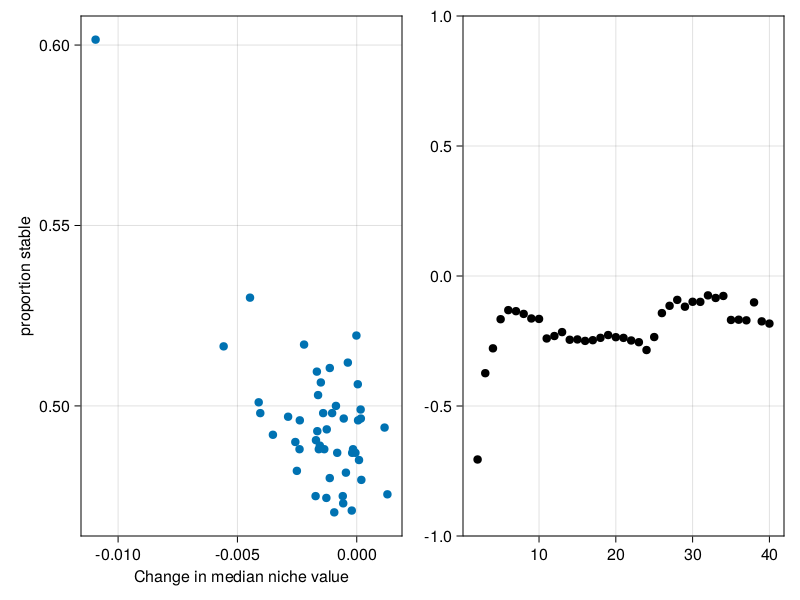

In [284]:
f = Figure()
ax1 = Axis(f[1,1], ylabel = "proportion stable", xlabel = "Change in median niche value")

T_range = 2:49

median_size = mean.(size)
Δmedian = median_size[:,T_range,:,2] .- median_size[:,T_range,:,1]

scatter!(ax1, mean(Δmedian, dims = 1)[1,:,1], psw[1,T_range,1,2])

ax2 = Axis(f[1,2])

for T_start = 2:40
    T_range = T_start:49
    
    median_size = mean.(size)
    Δmedian = median_size[:,T_range,:,2] .- median_size[:,T_range,:,1]

    scatter!(ax2, T_start, cor(mean(Δmedian, dims = 1)[1,:,1], psw[1,T_range,1,2]), color = "black")

end

ylims!(ax2, -1, 1)
 

f

In [295]:
abs(ComplexF64(1.0,1.0))

1.4142135623730951